# Linear Regression
## Simple Linear Regreesion

Linear relation ship with X and Y
\begin{equation}
Y \approx \beta_0 + \beta_1 X
\end{equation}

After using the training date, to get the estimated (predicted) Y on the basis of $X=x$, and hat symbol denote the estimated value 
\begin{equation}
\hat y = \hat \beta_0 + \hat \beta_1 x 
\end{equation}



###  Estimating the Coefficients (by using *least squares coefficient estimates*)

*Residual sum of squares* (RSS) as

$$RSS = e_1^2 + e_2^2 + \dots + e_n^2 
$$
where $e_i = y_i-\hat y_i$. Then expand it into

\begin{equation}
RSS = (y_1-\hat\beta_0-\hat \beta_1x_1)^2 + (y_2-\hat\beta_0-\hat \beta_1x_2)^2 + \dots + (y_n-\hat\beta_0-\hat \beta_1x_n)^2 = \sum_{i=1}^{n}(y_i-\hat\beta_0-\hat \beta_1x_i)^2
\end{equation}

After this, using the *least squares approach*, to calculate the condition to achieve minimal RSS
\begin{equation}
\frac{\mathrm d RRS_{(\beta_0,\beta_1)}}{\mathrm d \beta_1} = 2 \left( \beta_1\sum_{i=1}^{n}x_i^2 -\sum_{i=1}^{n}(y_i-\beta_0)x_i \right)=0, \\
\frac{\mathrm d RRS_{(\beta_0,\beta_1)}}{\mathrm d \beta_0} = 2 \left( n \beta_0 -\sum_{i=1}^{n}(y_i-\beta_1x_i) \right)=0
\end{equation}

So, 
\begin{equation}
\hat\beta_1=\cfrac {\sum_{i=1}^{n}(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^{n}(x_i-\bar x)^2}, \\
\hat\beta_0 = \bar y - \hat \beta_1 \bar x,
\end{equation}
Where $\bar x =\sum_{i=1}^{n}x_i$ and $\bar y =\sum_{i=1}^{n}y_i$, which are the samples.

In [23]:
# Import & Init Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn')

In [24]:
# Loading ad data
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


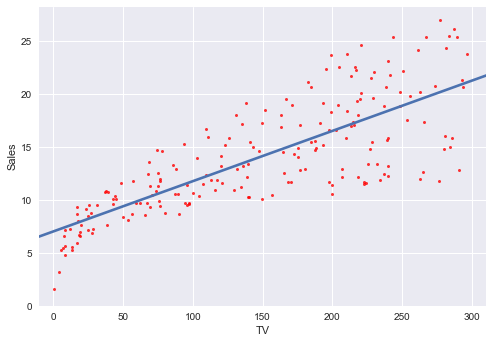

In [25]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

#### Figure 3.1 the least squares fit for the regression of sales onto TV 

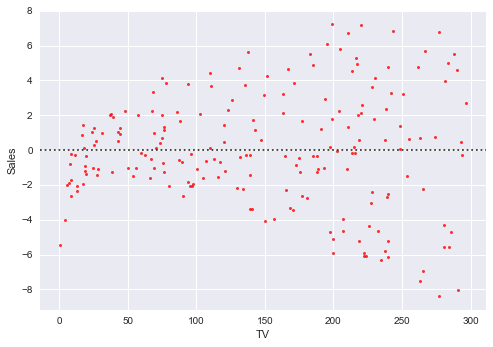

In [26]:
# Plot with the error
sns.residplot(advertising.TV, advertising.Sales, order=1, scatter_kws={'color':'r', 's':9})

In [27]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000
    
# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss


14.0225
[0.04753664]


2.1025305831313514

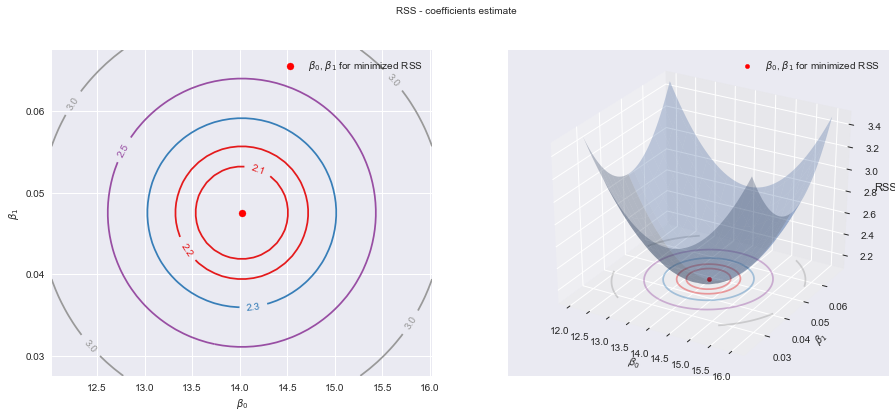

In [28]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - coefficients estimate', fontsize=10)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=10)
    ax.set_ylabel(r'$\beta_1$', fontsize=10)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

#### Figure 3.2 Contour and three-dimensional plots of the RSS 

### Assessing the accuary of coefficient Esitimates

